# 시계열분석

# 2장-1. Resampling
- alias(rule)을 이용해서, 데이터를 sampling 할 수 있다.
- 다양한 주기로 데이터를 집계(aggregate)해야 하는 경우 사용

In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

### 01-1. 데이터 불러오기

In [3]:
df = pd.read_csv('./data/apple_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [4]:
# Date컬럼의 타입을 datetime으로 바꿔주기
df['Date'] = df['Date'].apply(pd.to_datetime)

In [5]:
# Date컬럼을 인덱스로 지정
df.set_index('Date',inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


---

### 01-2. resmapling 이용

In [7]:
# 매년
df.resample(rule='A').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719
2010-12-31,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119
2011-12-31,52.489082,51.471100,52.008775,52.000618,1.230747e+08,34.822880
2012-12-31,83.117914,81.417309,82.378960,82.292817,1.319642e+08,56.076387
2013-12-31,68.234132,66.892443,67.589734,67.519269,1.016087e+08,53.083607
2014-12-31,93.012664,91.475538,92.219830,92.264654,6.315273e+07,84.295298
2015-12-31,121.244524,118.863095,120.175754,120.040000,5.183789e+07,112.931425
2016-12-31,105.427183,103.690278,104.507778,104.604008,3.841516e+07,100.449894
2017-12-31,151.406056,149.487650,150.444900,150.551075,2.713317e+07,147.299024


In [9]:
# 2009년만 보고 싶을 때
df.resample(rule='A').mean()['2009']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719


In [10]:
# custom으로 resampling 가능 => 년도의 첫번 째 값만 확인
def first_day(sample):
    return sample[0]

df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964


<AxesSubplot:xlabel='Date'>

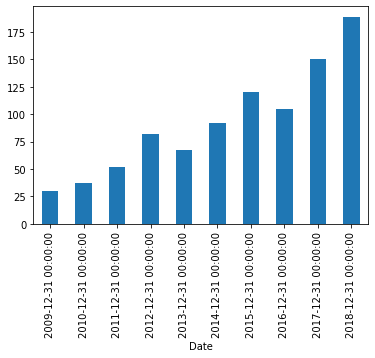

In [11]:
# 종가의 년 평균을 barplot으로 그리기

df['Close'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

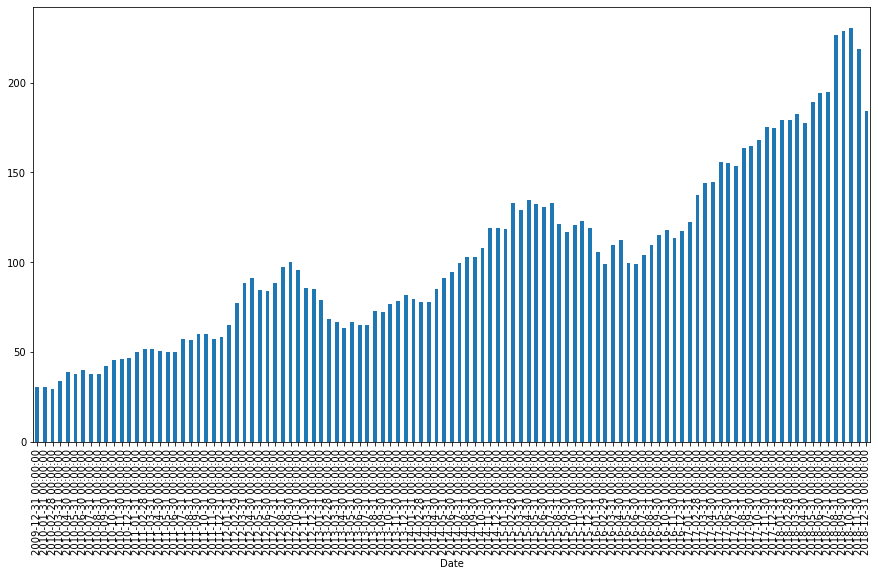

In [14]:
# 오픈가격의 월별 최대 값
df['Open'].resample(rule='M').max().plot(kind='bar', figsize=(15,8))

<AxesSubplot:xlabel='Date'>

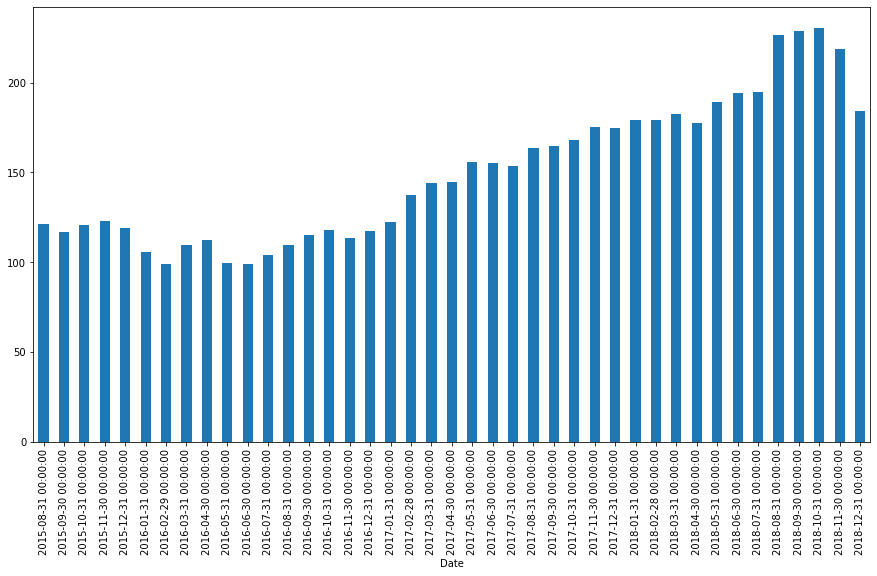

In [17]:
# 오픈가격의 월별 최대값 - 2015년 8월부터

df['Open']['2015-08':].resample('M').max().plot(kind='bar',figsize=(15,8))

<AxesSubplot:xlabel='Date'>

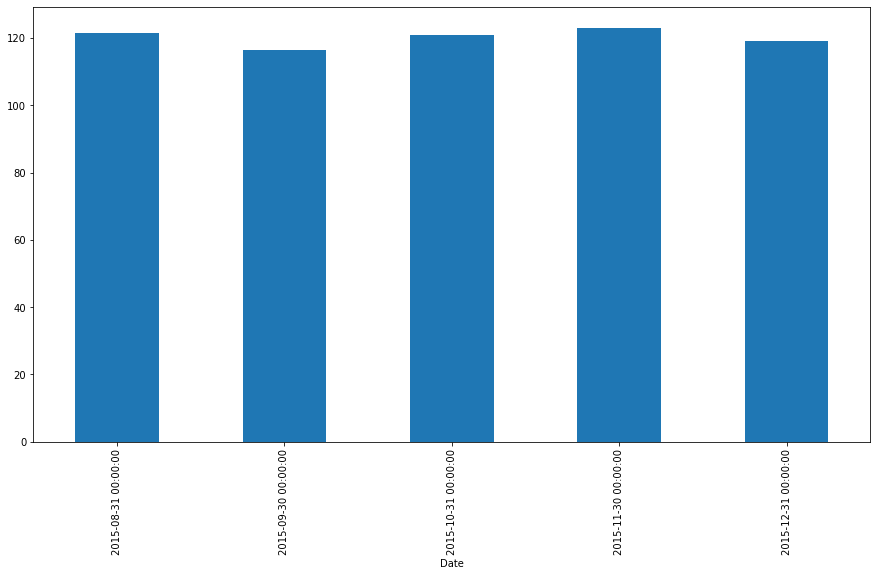

In [18]:
# 오픈가격의 월별 최대 값 - 2015년 8월부터 12월
df['Open']['2015-08':'2015-12'].resample('M').max().plot(kind='bar',figsize=(15,8))

---

### 01-3 앞서 만들었던 자료활용

In [22]:
daily_daterange = \
pd.date_range(start=datetime(2018,9,1),
             end=datetime(2019,1,24),
             freq='B')

daily_dataset = \
pd.DataFrame(
    data = {'value':np.random.rand(len(daily_daterange))},
    index = daily_daterange)

daily_dataset.head()

,value
2018-09-03,0.781680
2018-09-04,0.000876
2018-09-05,0.395949
2018-09-06,0.385025
2018-09-07,0.917844


In [23]:
# 월요일만 뽑아내기
daily_dataset.resample('W-MON').min()

,value
2018-09-03,0.781680
2018-09-10,0.000876
2018-09-17,0.450474
2018-09-24,0.153374
2018-10-01,0.081164
2018-10-08,0.067392
2018-10-15,0.123599
2018-10-22,0.420334
2018-10-29,0.232055
2018-11-05,0.270271


In [24]:
# 월별 최소값
daily_dataset.resample('M').min()

,value
2018-09-30,0.000876
2018-10-31,0.067392
2018-11-30,0.050084
2018-12-31,0.117697
2019-01-31,0.234051


---
---